In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


1. For the "Median value of owner-occupied homes" provide a boxplot.

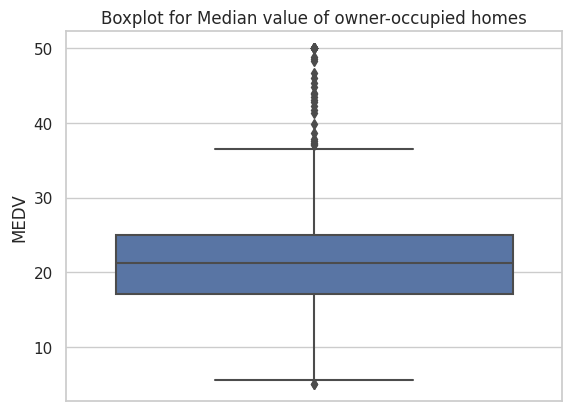

In [5]:
sns.set(style="whitegrid")
ax = sns.boxplot(y ="MEDV", data=boston_df)
plt.title('Boxplot for Median value of owner-occupied homes')
plt.show()

2. Provide a  bar plot for the Charles river variable.

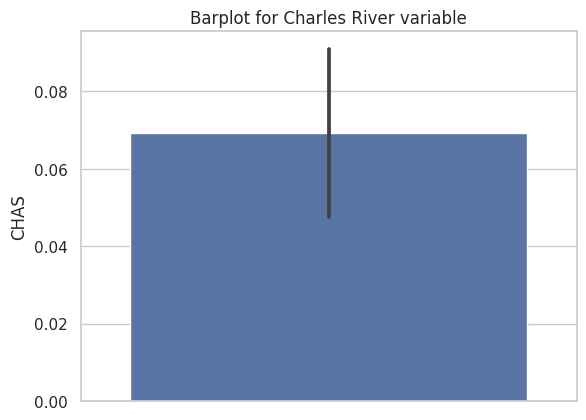

In [6]:
sns.set(style="whitegrid")
ax = sns.barplot(y = "CHAS", data= boston_df)
plt.title('Barplot for Charles River variable')
plt.show()

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

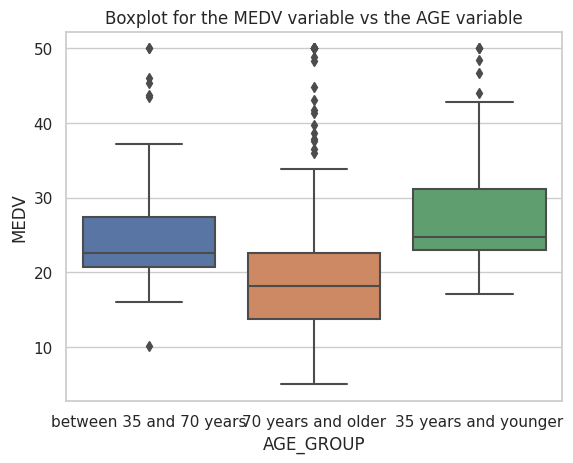

In [8]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'
ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot for the MEDV variable vs the AGE variable')
plt.show()

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of

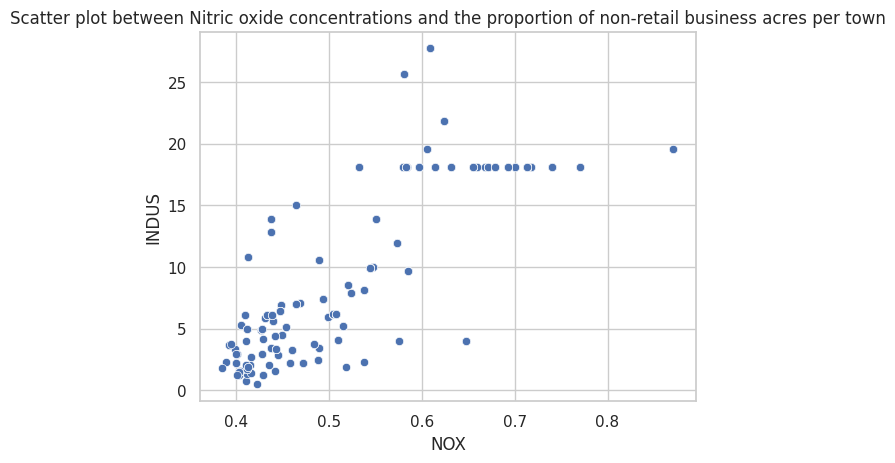

In [9]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter plot between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()


5. Create a histogram for the pupil to teacher ratio variable.

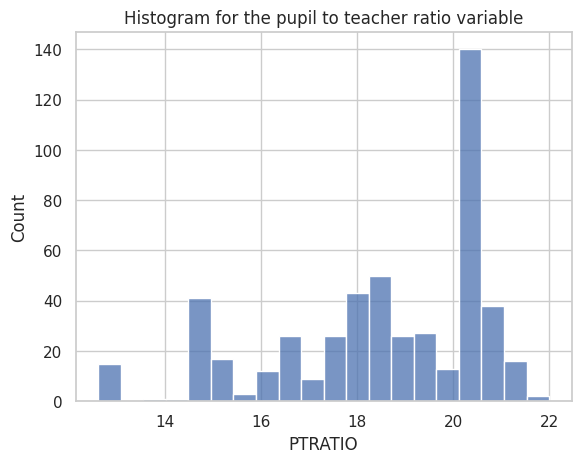

In [10]:
sns.histplot(boston_df['PTRATIO'], bins=20, kde=False)
plt.title('Histogram for the pupil to teacher ratio variable')
plt.show()

6. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [11]:
#H_0: u1=u2: There is no difference in median value of houses bounded by the Charles river.
#H_1: u1 not equal to u2: There is a difference in median value of houses bounded by the Charles river.
#Given alpha = 0.05
scipy.stats.ttest_ind(boston_df['CHAS'], boston_df['MEDV'])

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

Yes, since the p-value is less than alpha value 0.05, we reject the null hypothesis

7. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [12]:
thirthyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [13]:
f_statistic, p_value = scipy.stats.f_oneway(thirthyfive_lower,thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


 since the p-value is less than 0.05, we will reject the null hypothesis

8. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [14]:
#H_0: u1=u2: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
#H_1: u1 not equal to u2: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town, they are correlated.
#Given alpha = 0.05

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

since the p-value is less than 0.05, we will reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

9. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [15]:
#H_0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
#H_1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
#Given alpha = 0.05

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        18:54:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value is less than the alpha = 0.05, so we reject the null hypothesis and conclude that there is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
The additional weighted distance to the five Boston employment centres psitively impacts by 1.0916 on the median value of owner occupied homes.

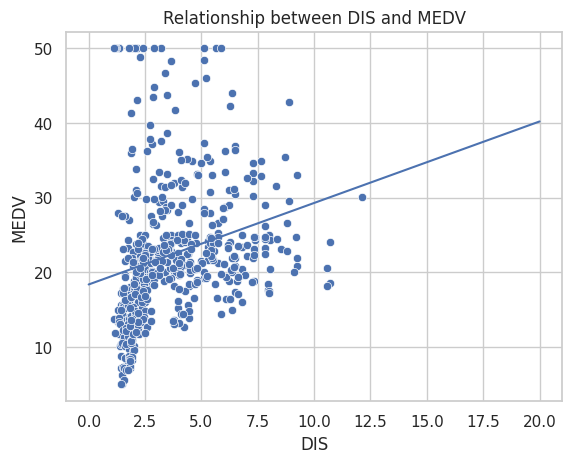

In [16]:
ax = sns.scatterplot(x="DIS", y="MEDV", data=boston_df)
X = np.linspace(0,20,800)
Y = 1.0916*X + 18.3901
plt.plot(X,Y)
plt.title('Relationship between DIS and MEDV')
plt.show()
